### Tweets extraction

In [33]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#TooGoodToGo_UK since:2018-01-01 until:2021-12-10').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [34]:
tweets_df

Datetime             Tweet Id  \
0   2021-07-06 16:21:27+00:00  1412446605102432257   
1   2021-07-06 12:17:38+00:00  1412385248323719174   
2   2021-07-06 11:46:33+00:00  1412377426039017476   
3   2021-07-06 08:14:43+00:00  1412324113931198465   
4   2021-07-06 07:29:07+00:00  1412312640261705728   
..                        ...                  ...   
496 2021-03-11 11:06:15+00:00  1369967901680295938   
497 2021-03-11 08:49:11+00:00  1369933410479792128   
498 2021-03-11 07:59:49+00:00  1369920986234114050   
499 2021-03-11 05:17:58+00:00  1369880256048467968   
500 2021-03-10 18:08:33+00:00  1369711791757029381   

                                                  Text         Username  
0    Aujourd'hui, miracle, j'ai enfin trouv√© un #Ve...  antoine_marette  
1    DORDOGNE / AH LES ORDURES !\nle @partisocialis...       donmichel1  
2    @Velib via @smovengo une catastrophe en marche...  NoCatWomanNoCry  
3    @PoussinToussain #Velib #VelibEnPanne https://...         nobru072  
4    @vinceakadiego @Velib Je m‚Äôinsurge !! L‚Äôabonn√©...  NoCatWomanNoCry  
..                                                 ...              ...  
496  .@fredbadina "2 choix s'offraient √† nous : fer...       ecoloParis  
497  Salut @Velib tu as mis √† jour ton app pour mie...      Clement_ici  
498  Oui @dburkli un audit sur les perspectives mai...       efalsanisi  
499  @David_Belliard @sylvainraifaud Si les velib f...    otman25925831  
500  @David_Belliard @sylvainraifaud Au final quel ...      Gallieni_57  

[501 rows x 4 columns]

In [35]:
tweets = tweets_df.drop(columns=['Tweet Id','Username'])
tweets.head()

Datetime                                               Text
0 2021-07-06 16:21:27+00:00  Aujourd'hui, miracle, j'ai enfin trouv√© un #Ve...
1 2021-07-06 12:17:38+00:00  DORDOGNE / AH LES ORDURES !\nle @partisocialis...
2 2021-07-06 11:46:33+00:00  @Velib via @smovengo une catastrophe en marche...
3 2021-07-06 08:14:43+00:00  @PoussinToussain #Velib #VelibEnPanne https://...
4 2021-07-06 07:29:07+00:00  @vinceakadiego @Velib Je m‚Äôinsurge !! L‚Äôabonn√©...

##### Step 1 : Identification of tweet content tags 

In [39]:
comment_list = tweets['Text'].to_list()

In [43]:
comment_list

["Aujourd'hui, miracle, j'ai enfin trouv√© un #Velib √©lectrique qui marchait ! Non, j'plaisante... https://t.co/N5hn1kR7y2",
 "DORDOGNE / AH LES ORDURES !\nle @partisocialiste nous a envoy√© depuis Paris le responsable de #autolib et de #velib qui ont bu le bouillon pour s'occuper  d'abord de la communaut√© de communes de Bergerac et aujourd'hui du ramassage des ordures\nhttps://t.co/jIq35n6MUQ",
 '@Velib via @smovengo une catastrophe en marche. Bravo @Paris @egregoire @Anne_Hidalgo pour ce choix. L‚Äôexpression de boomer ¬´\xa0c‚Äô√©tait mieux avant\xa0¬ª est pourtant tellement adapt√©e √† ce que les usagers #velib vivent tous les jours üò§ https://t.co/6LbVKCQ9Ls',
 '@PoussinToussain #Velib #VelibEnPanne https://t.co/LHPDAdatl0',
 '@vinceakadiego @Velib Je m‚Äôinsurge !! L‚Äôabonn√©e @Velib sans casque sous le bras que je suis, marche plus souvent que p√©dale puisque je ne trouve que rarement un #velib utilisable. #remboursez',
 '(Oui j‚Äôai d√©bloqu√© mon compte et je m‚Äôacharne 

In [44]:
import re

tweet_list = []  
# liste √† enrichir avec uniquement le contenu des tweets 

for tweet in comment_list:
    split_tweet = re.findall(r'"(.*?)"', tweet)
    for word in split_tweet:
        tweet_list.append(word)
        
print(tweet_list[0:7])   
# extrait de la liste avec le contenu des tweets

['v√©los', '30', 'distanciation sociale', 'Bonjour RATP', 'Bonjour RATP', "vous n'auriez pas tap√© le point √† la fin dans le mot de passe provisoire ?", "Ben j'ai fait un cop/col"]


##### Step 2 : Regex characters removals

In [45]:
def remove_punc(string):
    punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'  
    # ensemble des caract√®res sp√©ciaux etc √† retirer des tweets
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, " ") 
    return string
 
tweet_list = [remove_punc(i) for i in tweet_list]

# extrait de la liste nettoy√©e
print(tweet_list) 

['v√©los', '30', 'distanciation sociale', 'Bonjour RATP', 'Bonjour RATP', 'vous n auriez pas tap√© le point √† la fin dans le mot de passe provisoire  ', 'Ben j ai fait un cop col', 'Voil√†  il faut enlever le point', 'Par ailleurs  concernant le temps n√©cessaire pour remettre les v√©los sur les bornes  veillez √† pr√©voir plus de temps lors de vos d√©placements et anticiper la restitution ', 'nous intensifions les  mobilit√©s actives', 'gratuit√© des transports', 'comprises', 'la gratuit√© des transports', '√áa marche pas', 'Ah mais tu m avais pas dit', 'C est contractuel', 'Oui mais c est grands et on a pas assez de gens', 'Contrat   engagement', 'Oui mais faut nous pr√©venir', 'BIG DATA', 'Station ', 'Park ', 'Ah il est crev√©  ah il se d√©croche pas  ah il a pas de freins  ', 'gratuit', 'trop consommateurs de v√©los √©lectriques', 'correct', 'mon temps de location s √©l√®ve √† pr√©sent √† 2h', 'du √† un tr√®s grand nombre d appels', 'vos', ' le monde d avant quand tout √©tait mieu

##### Step 3 : Conversion of all tweets in one single character chain

In [46]:
mystring =' '.join([str(item) for item in tweet_list])

print(mystring[0:400])   
# extrait de la cha√Æne de caract√®res unique avec les tweets nettoy√©s

v√©los 30 distanciation sociale Bonjour RATP Bonjour RATP vous n auriez pas tap√© le point √† la fin dans le mot de passe provisoire   Ben j ai fait un cop col Voil√†  il faut enlever le point Par ailleurs  concernant le temps n√©cessaire pour remettre les v√©los sur les bornes  veillez √† pr√©voir plus de temps lors de vos d√©placements et anticiper la restitution  nous intensifions les  mobilit√©s actives


##### Step 4 : Standardization of the character chain obtained

In [47]:
mystring = mystring.lower()

print(mystring[0:400])   
# extrait de la cha√Æne de caract√®res unique avec les tweets uniformis√©s

v√©los 30 distanciation sociale bonjour ratp bonjour ratp vous n auriez pas tap√© le point √† la fin dans le mot de passe provisoire   ben j ai fait un cop col voil√†  il faut enlever le point par ailleurs  concernant le temps n√©cessaire pour remettre les v√©los sur les bornes  veillez √† pr√©voir plus de temps lors de vos d√©placements et anticiper la restitution  nous intensifions les  mobilit√©s actives


##### Step 5 : Building up the Stopwords list 

In [48]:
from nltk.corpus import stopwords
NLTK_STOPWORDS = stopwords.words("english")

#Loading Stopwords into a list
print("Total numbers of stop words are ")
print(len(NLTK_STOPWORDS))
print(NLTK_STOPWORDS)

# importing Nltk stopword package
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

In [2]:
# Update manually STOPWORDS list to exclude "no", "nor", "not", "but"
STOPWORDS = 

### Wordcloud

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

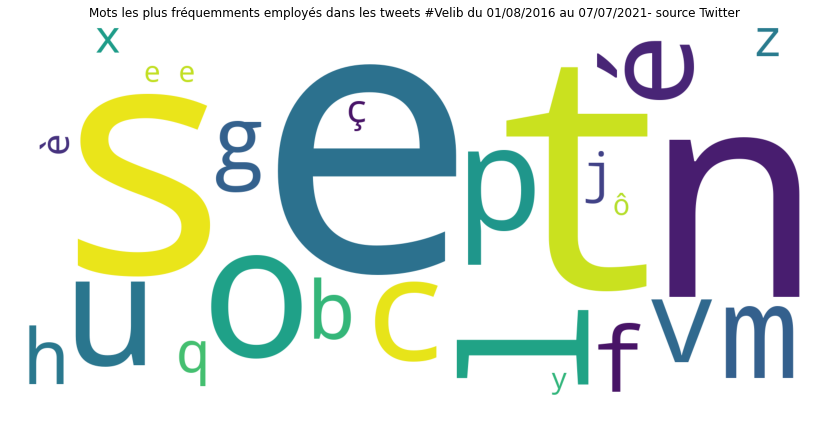

In [51]:
text = mystring

from wordcloud import WordCloud
stopwords= set(STOPWORDS)|{"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}

def create_cloud(text):
    x= [i for i in text]
    y= ' '.join(x)
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(15,7.5))
    plt.axis('off')
    plt.title('Most frequent words in tweets #TooGoodToGo_UK from 01/01/2018 till 30/11/2021- source Twitter')
    plt.imshow(cloud)
    plt.show()

create_cloud(text)